In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def is_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [6]:
test_results = pd.read_csv('test_results.csv', header=None)

In [36]:
def results_arrays(csv_file):
    results = pd.read_csv(csv_file, header=None)
    result_arrays = {}
    for i in range(len(results)):
        np_array = np.array(results.loc[i, 2:].tolist())
        filtered_np_array = np_array[~is_outlier(np_array)]
        final_array = filtered_np_array[~np.isnan(filtered_np_array)]
        result_arrays[results.loc[i,1]] = [
                final_array.mean(), 
                np.median(final_array), 
                np.percentile(final_array, 90), 
                np.percentile(final_array, 95), 
                np.percentile(final_array, 99)
            ]
            

    return result_arrays

In [37]:
test = results_arrays('test_results.csv')

In [44]:
pd.DataFrame.from_dict(test, orient='index', columns=['Mean','Median','90 Percentile', '95 Percentile', '99 Pecentile'])

,Mean,Median,90 Percentile,95 Percentile,99 Pecentile
pubs:10 subs:100 broker,8.282079,8.082275,10.361426,11.219434,12.765273
pubs:10 subs:50 broker,14.804834,8.104248,17.941626,59.960742,118.897346
pubs:10 subs:10 broker,8.394155,5.890381,10.611890,29.482263,33.737913
pubs:100 subs:10 broker,-114.112000,64.983032,297.730420,379.882483,479.844788
pubs:50 subs:10 broker,-393.146514,8.833008,88.389111,296.283264,390.812544
pubs:50 subs:10 flood,63.573533,188.210938,312.804272,324.482568,345.428645
pubs:100 subs:10 flood,-257.392620,181.219482,319.756299,329.641199,339.336042
pubs:10 subs:100 flood,143.367651,136.760010,269.006128,290.514893,335.767231
pubs:10 subs:50 flood,191.858239,192.327637,319.109985,342.802881,367.604468
pubs:0 subs:10 flood,13.175259,173.536499,340.675854,354.357275,373.285051


In [50]:
def results_arrays_raw(csv_file):
    results = pd.read_csv(csv_file, header=None)
    result_arrays = {}
    for i in range(len(results)):
        np_array = np.array(results.loc[i, 2:].tolist())
        filtered_np_array = np_array[~is_outlier(np_array)]
        final_array = filtered_np_array[~np.isnan(filtered_np_array)]
        result_arrays[results.loc[i,1]] = final_array
            

    return result_arrays

In [51]:
test2 = results_arrays_raw('test_results.csv')

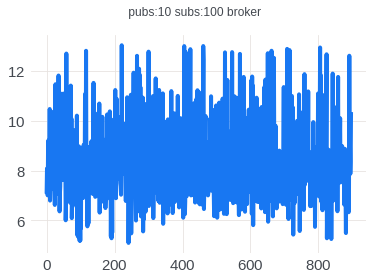

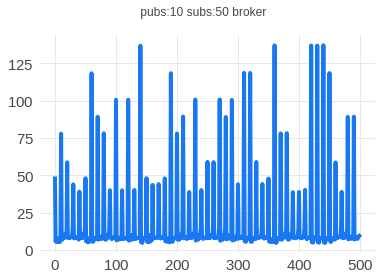

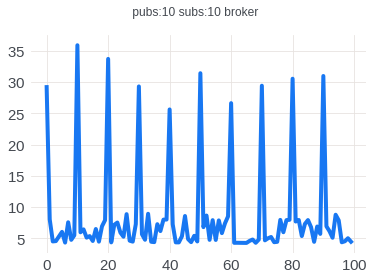

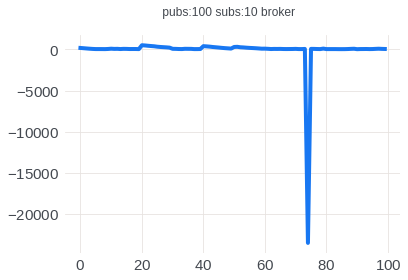

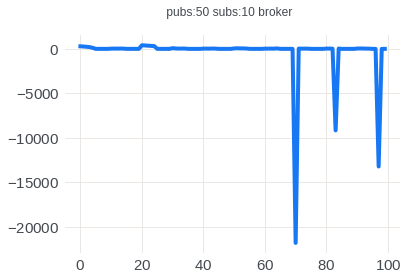

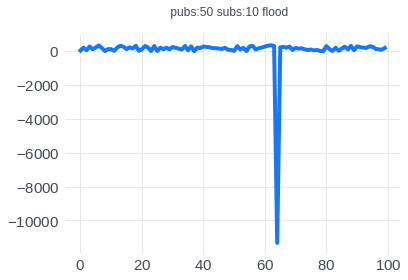

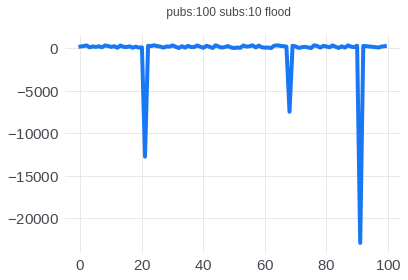

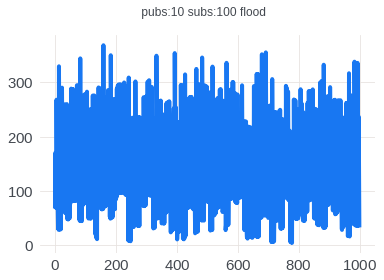

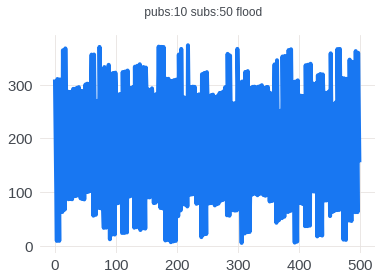

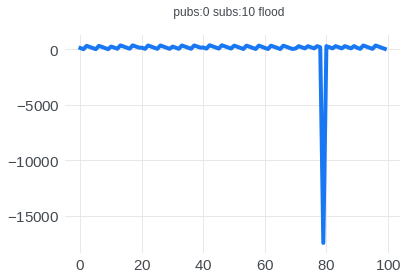

In [53]:
for i, v in test2.items():
    plt.plot(v)
    plt.suptitle(i)
    plt.show()